Develop a text classification model to
classify SMS as either spam or non-spam
using data science techniques in Python.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
sms = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [42]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [43]:
sms = sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [44]:
sms = sms.rename(columns={'v1': 'label', 'v2': 'message'})

In [45]:
sms['label'] = sms['label'].map({'ham': 0, 'spam': 1})

In [46]:
sms['length'] = sms['message'].apply(len)

<ipython-input-47-089f14208ad5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=sms, palette=['pink', 'lightblue'])


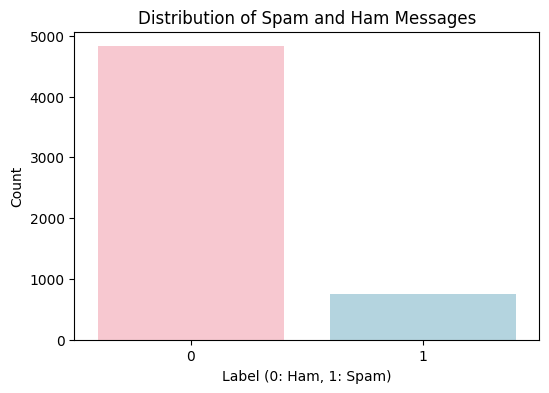

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=sms, palette=['pink', 'lightblue'])
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

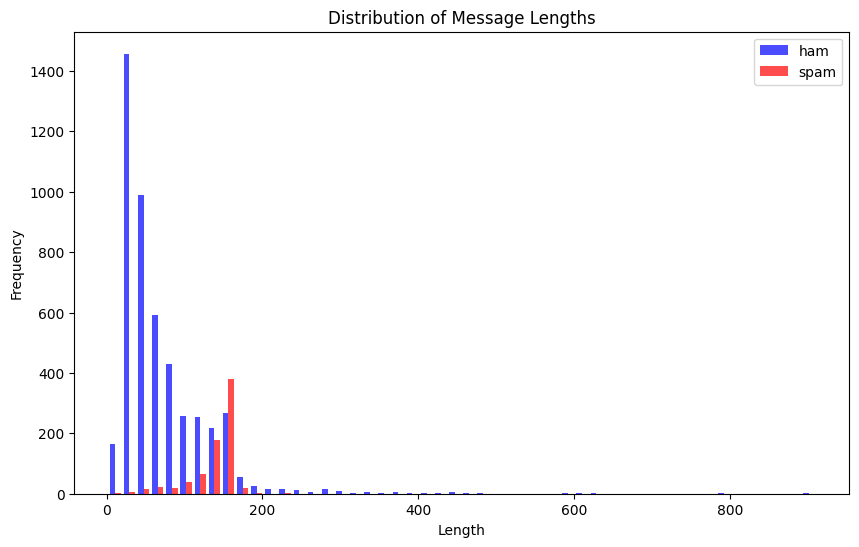

In [48]:
plt.figure(figsize=(10, 6))
plt.hist([sms[sms['label'] == 0]['length'], sms[sms['label'] == 1]['length']], bins=50, alpha=0.7, color=['blue', 'red'], label=['ham', 'spam'])
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Message Lengths')
plt.show()

In [49]:
def text_process(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [50]:
sms['processed_message'] = sms['message'].apply(text_process)

In [51]:
vectorizer = TfidfVectorizer(stop_words='english')

In [52]:
features = vectorizer.fit_transform(sms['processed_message'])

In [53]:
# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)


In [54]:
# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(features_train, labels_train)


LogisticRegression(solver='liblinear')

In [55]:
# Predict on the test set
predictions = model.predict(features_test)

# Evaluate the model
accuracy = accuracy_score(labels_test, predictions)
classification_rep = classification_report(labels_test, predictions)

print(f'Accuracy: {accuracy}')
print(classification_rep)


Accuracy: 0.9419856459330144
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1440
           1       0.99      0.59      0.74       232

    accuracy                           0.94      1672
   macro avg       0.96      0.79      0.85      1672
weighted avg       0.94      0.94      0.94      1672



In [56]:
# Example new SMS messages
new_messages = ["Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/12345 to claim now.",
                "Hey, are we still meeting for lunch today?"]

# Transform the new messages using the same TF-IDF vectorizer
new_messages_transformed = vectorizer.transform(new_messages)

# Predict the labels
new_predictions = model.predict(new_messages_transformed)

# Map the predictions back to 'ham' or 'spam'
new_predictions_labels = ['spam' if label == 1 else 'ham' for label in new_predictions]
print(new_predictions_labels)


['ham', 'ham']
